In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pickle import dump
from sklearn.ensemble import RandomForestRegressor
import sqlite3



Used the first time to download the Data and save it on .csv file

In [94]:
#off_set = 0
#all_data = []
#for i in range(100) :
#    url = f'https://api.rentcast.io/v1/properties?state=FL&limit=500&offset={off_set}'  

#    headers = {
#    "Accept" : "application/json",
#    "X-API-Key":"dcc30d3e7e454610af41d9e6ddddeea7"
#}

#    response  = requests.get(url, headers = headers)
#
#    if response.status_code == 200:
#        data = response.json()
#        all_data.extend(data)
#        
#    else:
#        print(f"Error {response.status_code} - {response.text}")
#    11
#    off_set += 500
#
#df = pd.json_normalize(all_data)
#df.to_csv("data.csv", index = False)

In [95]:
csv_file = 'data.csv'
data = pd.read_csv("../data/processed/data.csv")

conn = sqlite3.connect('../data/data.db')

conn.execute(""" CREATE TABLE IF NOT EXISTS properties (
             
id                  TEXT   PRIMARY KEY,
formattedAddress    TEXT,
city                TEXT,
state               TEXT,
zipCode             TEXT,
county              TEXT,
latitude            DECIMAL,
longitude           DECIMAL,
propertyType        TEXT,
bedrooms            INTEGER,
bathrooms           INTEGER,
squareFootage       INTEGER,
lotSize             INTEGER,
yearBuilt           INTEGER,
subdivision         TEXT,
zoning              TEXT,
lastSaleDate        DATETIME,
lastSalePrice       INTEGER,
hoa                 TEXT,
architectureType    TEXT,
cooling             TEXT,
coolingType         TEXT,
heating             TEXT,
heatingType         TEXT,
exteriorType        TEXT,
fireplace           TEXT,
floorCount          INTEGER,
foundationType      TEXT,
garage              TEXT,
garageSpaces        INTEGER,
garageType          TEXT,
pool                TEXT,
roomCount           INTEGER,
unitCount           INTEGER,
viewType            TEXT
);            
"""
)

data.to_sql('property_prices' , conn, if_exists='replace', index=False)

conn.close()


/tmp/ipykernel_30456/3206326106.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/processed/data.csv")


In [96]:
conn = sqlite3.connect('../data/data.db')
data= pd.read_sql_query('SELECT * FROM property_prices', conn)
conn.close()

In [97]:
data.head()

,id,formattedAddress,city,state,zipCode,county,latitude,longitude,propertyType,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,subdivision,zoning,lastSaleDate,lastSalePrice,hoa,architectureType,cooling,coolingType,heating,heatingType,exteriorType,fireplace,floorCount,foundationType,garage,garageSpaces,garageType,pool,roomCount,unitCount,viewType
0,"13931-Osprey-Links-Rd,-Orlando,-FL-32837","13931 Osprey Links Rd, Orlando, FL 32837",Orlando,FL,32837,Orange,28.363776,-81.418356,Single Family,2.0,2.0,27160.0,1205181.0,1996.0,HUNTERS CREEK TR 105 & 110,P-D,2024-06-27T00:00:00.000Z,100594000.0,NaN,Multi-Unit Building,1,Central,1,Forced Air,Stucco,0,3.0,None,1,NaN,Detached,False,16.0,19.0,None
1,"3896-Hammock-Bluff-Dr,-Jacksonville,-FL-32226","3896 Hammock Bluff Dr, Jacksonville, FL 32226",Jacksonville,FL,32226,Duval,30.473953,-81.553593,Single Family,4.0,3.0,2345.0,7190.0,2018.0,TALLOW RIDGE PHASE 01,PUD,2024-06-27T00:00:00.000Z,359900.0,NaN,None,1,Central,1,Forced Air,Aluminum / Vinyl Siding,0,2.0,None,1,2.0,Garage,False,NaN,1.0,None
2,"2153-Sw-Newport-Isles-Blvd,-Port-Saint-Lucie,-...","2153 Sw Newport Isles Blvd, Port Saint Lucie, ...",Port Saint Lucie,FL,34953,Saint Lucie,27.255187,-80.407685,Single Family,3.0,2.5,1938.0,6036.0,2006.0,FOURTH REPLAT OF PORTOFINO ISLES,PLANNED UN,2024-06-27T00:00:00.000Z,380000.0,NaN,None,1,Commercial,1,Forced Air,Stucco,0,2.0,Slab / Mat / Raft,1,NaN,Attached,False,10.0,1.0,None
3,"56-North-St,-Mary-Esther,-FL-32569","56 North St, Mary Esther, FL 32569",Mary Esther,FL,32569,Okaloosa,30.410768,-86.673981,Single Family,3.0,2.0,1439.0,7646.0,1988.0,GLENOAKS,None,2024-06-27T00:00:00.000Z,310000.0,NaN,None,1,Central,1,Forced Air,Aluminum / Vinyl Siding,1,1.0,None,1,NaN,Garage,False,NaN,1.0,None
4,"17525-Circle-Pond-Ct,-Boca-Raton,-FL-33496","17525 Circle Pond Ct, Boca Raton, FL 33496",Boca Raton,FL,33496,Palm Beach,26.414345,-80.202314,Single Family,5.0,6.5,5063.0,11443.0,2002.0,FOX HILL ESTATES OF BOCA RATON,AGR-PUD,2024-06-27T00:00:00.000Z,2000000.0,1150.0,None,1,Commercial,1,Forced Air,Stucco,0,2.0,None,1,NaN,Garage,True,NaN,1.0,Water


In [98]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [99]:
cidades = data['city'].value_counts()
cities_to_keep = cidades[cidades > 100].index
data = data[data['city'].isin(cities_to_keep)]
data['city'].value_counts()

city
Jacksonville          5997
Miami                 4842
Orlando               4248
Tampa                 4023
Naples                3132
Cape Coral            2784
Kissimmee             2691
Ocala                 2614
Saint Petersburg      2598
Bradenton             2409
Fort Myers            2327
Sarasota              2312
Port Saint Lucie      2195
Saint Augustine       1985
Fort Lauderdale       1925
Davenport             1884
West Palm Beach       1792
Lehigh Acres          1697
Boca Raton            1683
Lakeland              1569
Port Charlotte        1514
Wesley Chapel         1499
The Villages          1448
Pensacola             1420
Delray Beach          1304
Palm Bay              1245
Punta Gorda           1223
Boynton Beach         1221
Palm Coast            1188
Venice                1166
Tallahassee           1134
Hollywood             1112
Clearwater            1097
Riverview             1069
Homestead             1056
Saint Cloud           1052
Pompano Beach          

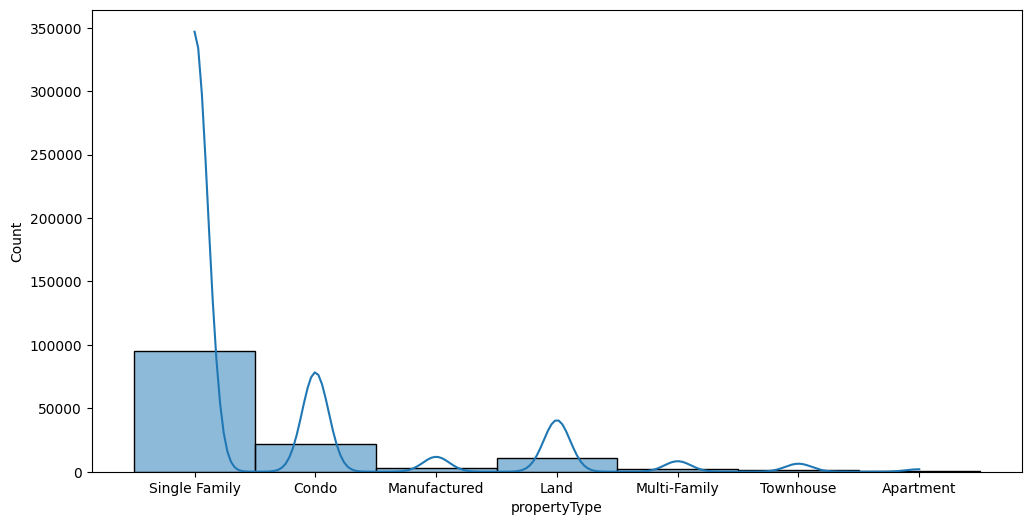

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(data['propertyType'], bins = 50, kde = True)
plt.show()

In [101]:

data['propertyType']
data = data.query("propertyType not in ['Land', 'Multi-Family', 'Condo' ]")
data['propertyType'].value_counts()

propertyType
Single Family    95218
Manufactured      3224
Townhouse         1738
Apartment          528
Name: count, dtype: int64

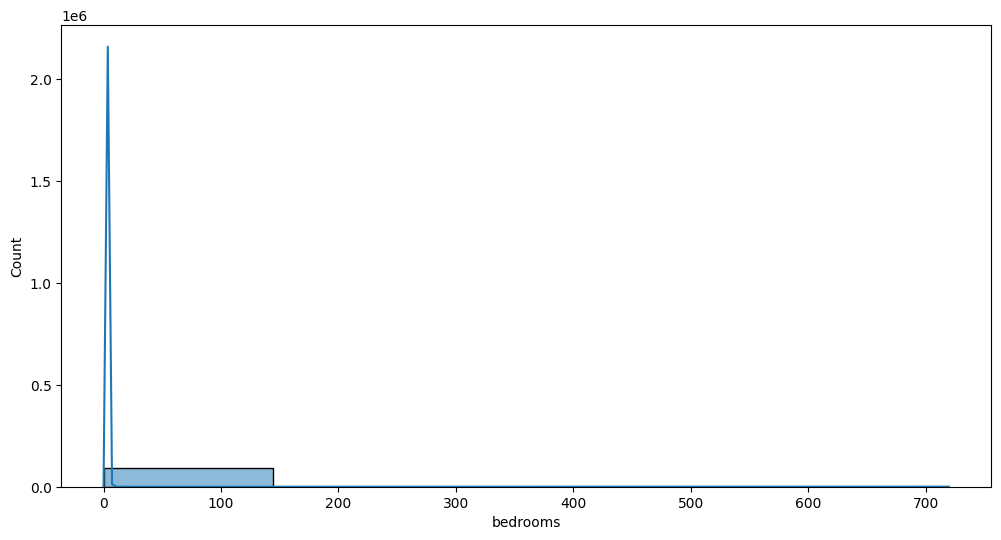

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(data['bedrooms'], bins = 5, kde = True)
plt.show()

In [103]:
data['bedrooms'].value_counts()
data = data.query("bedrooms <6")
data['bedrooms'].value_counts()

bedrooms
3.0    48029
4.0    21382
2.0    17421
5.0     4215
1.0      903
0.0       10
Name: count, dtype: int64

In [104]:
data['garageType'].value_counts()

garageType
Garage             34619
Attached           16938
Carport             7727
Detached            1306
Mixed               1260
Basement              78
Attached Garage       66
Detached Garage        5
Other                  4
Finished               4
Built-in               1
2                      1
Name: count, dtype: int64

In [105]:
data['lastSalePrice'].value_counts().ordered = True
data = data.query("lastSalePrice < 1000000")
data['lastSalePrice'].value_counts().sum()

np.int64(85311)

In [106]:
data['pool'].value_counts()
data = data.query("pool not in ['Type Unknown']")
data['pool'].value_counts()

pool
False       68393
0            8533
True         7390
1             984
Inground        3
Pool/spa        1
Name: count, dtype: int64

In [107]:
data['bathrooms'].value_counts()
data = data.query("bathrooms <= 6")

data['bathrooms'].value_counts()

bathrooms
2.0    55576
3.0    10524
1.0    10022
2.5     5849
4.0     1251
3.5      965
1.5      745
4.5      194
5.0      116
5.5       14
6.0       12
0.5        3
Name: count, dtype: int64

In [108]:
data['lotSize'].value_counts()
data = data[data['lotSize'] <= 300000]
data['lotSize'].value_counts()


lotSize
10000.0     2615
10019.0     2017
10454.0      888
6000.0       861
7405.0       781
10890.0      772
7500.0       757
6098.0       692
8712.0       590
6534.0       588
6970.0       587
7841.0       567
8276.0       551
5000.0       550
9583.0       542
11326.0      525
5663.0       494
9148.0       453
5227.0       433
4792.0       425
12197.0      390
11761.0      382
7000.0       359
5500.0       358
12632.0      334
2178.0       280
13068.0      265
7200.0       257
4800.0       246
4356.0       246
2614.0       246
8250.0       245
6500.0       238
9600.0       234
3920.0       231
14810.0      230
8000.0       227
13504.0      225
13939.0      218
3485.0       216
6600.0       214
1742.0       213
5400.0       212
9999.0       211
14375.0      208
9000.0       206
5750.0       193
5100.0       187
4400.0       186
5998.0       186
3049.0       169
7501.0       168
43560.0      165
15000.0      158
8400.0       157
10625.0      154
5502.0       152
6050.0       145
6250.0

In [109]:
data['yearBuilt'].value_counts()
data = data[data['yearBuilt'] <= 2024]
data = data[data['yearBuilt'] >= 1950]
data['yearBuilt'].value_counts().sum()

np.int64(77486)

In [110]:
data['lotSize'].value_counts()

lotSize
10000.0     2476
10019.0     1733
6000.0       790
10454.0      778
7405.0       727
7500.0       718
10890.0      707
6098.0       640
8712.0       579
6534.0       545
7841.0       539
8276.0       532
6970.0       532
9583.0       520
11326.0      492
5663.0       450
5000.0       444
9148.0       432
5227.0       393
4792.0       384
11761.0      365
12197.0      361
5500.0       329
7000.0       320
12632.0      311
2178.0       256
13068.0      241
8250.0       234
2614.0       231
9600.0       229
4356.0       227
4800.0       225
6500.0       223
7200.0       223
8000.0       221
13504.0      215
3920.0       214
14810.0      211
13939.0      206
1742.0       205
3485.0       202
5400.0       199
9000.0       199
6600.0       195
14375.0      193
9999.0       190
5100.0       176
5750.0       176
5998.0       171
4400.0       165
43560.0      158
7501.0       157
3049.0       156
10625.0      151
8400.0       147
15000.0      144
15246.0      137
6050.0       136
11250.

In [111]:
data['lastSalePrice'].isnull().sum()
median_price = data['lastSalePrice'].median()
data['lastSalePrice'].fillna(median_price)

1         359900.0
2         380000.0
13        360000.0
14        425000.0
16        390000.0
17        780000.0
19        153000.0
22        280000.0
23        890000.0
25        220000.0
26        213000.0
27        400000.0
28        210525.0
29        570000.0
30        275000.0
32        515000.0
33        350000.0
34        912000.0
36        189000.0
39        240000.0
40        132000.0
43        415000.0
44        486990.0
45        405000.0
48        696000.0
50        315000.0
66        169900.0
67        425000.0
68        388000.0
69        360000.0
71        275000.0
72        302000.0
73        440000.0
74        380000.0
75        150000.0
77        530000.0
79        220000.0
82        465000.0
83        485000.0
84        760000.0
85        305000.0
86        650000.0
87        125000.0
88        230000.0
89        630000.0
90        645000.0
91        905000.0
96        212500.0
98        600100.0
99        394000.0
100       294900.0
103       440000.0
104       13

In [112]:
data['lastSalePrice'].value_counts()
data = data.query("lastSalePrice <=1000000")

data['lastSalePrice'].value_counts()

lastSalePrice
350000.0    960
300000.0    862
400000.0    784
450000.0    724
375000.0    679
340000.0    665
360000.0    643
250000.0    640
325000.0    628
315000.0    611
500000.0    600
380000.0    577
320000.0    577
330000.0    549
370000.0    548
390000.0    543
275000.0    540
310000.0    533
425000.0    528
385000.0    522
290000.0    520
365000.0    520
420000.0    507
550000.0    504
410000.0    495
355000.0    492
280000.0    490
335000.0    483
415000.0    477
430000.0    471
305000.0    470
260000.0    464
285000.0    461
345000.0    449
200000.0    446
270000.0    444
395000.0    434
475000.0    422
265000.0    417
295000.0    413
440000.0    412
460000.0    407
240000.0    405
225000.0    396
435000.0    392
525000.0    390
600000.0    383
405000.0    371
480000.0    368
650000.0    354
255000.0    352
490000.0    347
230000.0    347
10000.0     343
470000.0    340
245000.0    335
220000.0    334
235000.0    333
445000.0    330
520000.0    329
515000.0    318
485000.0  

In [113]:
data['floorCount'].value_counts()
data = data.query("floorCount <= 3.0")

data['floorCount'].value_counts()

floorCount
1.0    55887
2.0    11080
3.0      291
Name: count, dtype: int64

In [114]:
data['coolingType'].value_counts()
data = data.query("coolingType not in ['Type Unknown', 'Dual Unit', 'Chilled Water','Split System' , 'Refrigeration' , 'Window Unit','Wall Unit', 'Fan Cooling'  ]")
data['coolingType'].value_counts()

coolingType
Central       40948
Commercial    15336
Package        1681
Window          237
Wall            169
Name: count, dtype: int64

In [115]:
data.isna().sum()

id                      0
formattedAddress        0
city                    0
state                   0
zipCode                 0
county                 25
latitude                0
longitude               0
propertyType            0
bedrooms                0
bathrooms               0
squareFootage          10
lotSize                 0
yearBuilt               0
subdivision          1488
zoning              16863
lastSaleDate            0
lastSalePrice           0
hoa                 63178
architectureType    56694
cooling                 0
coolingType          8878
heating                 0
heatingType         16740
exteriorType         2200
fireplace               0
floorCount              0
foundationType      34231
garage                  0
garageSpaces        52108
garageType          13160
pool                    0
roomCount           59632
unitCount            6434
viewType            65974
dtype: int64

hoa  'roomCount

In [116]:
print(list(data.columns))

['id', 'formattedAddress', 'city', 'state', 'zipCode', 'county', 'latitude', 'longitude', 'propertyType', 'bedrooms', 'bathrooms', 'squareFootage', 'lotSize', 'yearBuilt', 'subdivision', 'zoning', 'lastSaleDate', 'lastSalePrice', 'hoa', 'architectureType', 'cooling', 'coolingType', 'heating', 'heatingType', 'exteriorType', 'fireplace', 'floorCount', 'foundationType', 'garage', 'garageSpaces', 'garageType', 'pool', 'roomCount', 'unitCount', 'viewType']


'unitCount', 'zoning','viewType', 'architectureType','subdivision','exteriorType','foundationType', 'lastSaleDate','garageType', 'id', 'formattedAddress', 'state', 'roomCount', 'hoa'

In [117]:
#data = data.drop(columns = ['viewType', 'unitCount', 'zoning', 'architectureType','subdivision','exteriorType', 'latitude', 'longitude','foundationType', 'lastSaleDate','garageType', 'id', 'formattedAddress', 'state', 'roomCount', 'hoa' ])

In [118]:
data.isna().sum()

id                      0
formattedAddress        0
city                    0
state                   0
zipCode                 0
county                 25
latitude                0
longitude               0
propertyType            0
bedrooms                0
bathrooms               0
squareFootage          10
lotSize                 0
yearBuilt               0
subdivision          1488
zoning              16863
lastSaleDate            0
lastSalePrice           0
hoa                 63178
architectureType    56694
cooling                 0
coolingType          8878
heating                 0
heatingType         16740
exteriorType         2200
fireplace               0
floorCount              0
foundationType      34231
garage                  0
garageSpaces        52108
garageType          13160
pool                    0
roomCount           59632
unitCount            6434
viewType            65974
dtype: int64

In [119]:
data = pd.get_dummies(data,  columns = [ 'propertyType', 'heatingType',  'garageSpaces',  'coolingType', 'city', 'county','pool'])

In [120]:

data.isna().sum()







id                                0
formattedAddress                  0
state                             0
zipCode                           0
latitude                          0
longitude                         0
bedrooms                          0
bathrooms                         0
squareFootage                    10
lotSize                           0
yearBuilt                         0
subdivision                    1488
zoning                        16863
lastSaleDate                      0
lastSalePrice                     0
hoa                           63178
architectureType              56694
cooling                           0
heating                           0
exteriorType                   2200
fireplace                         0
floorCount                        0
foundationType                34231
garage                            0
garageType                    13160
roomCount                     59632
unitCount                      6434
viewType                    

In [121]:
#data['squareFootage' ].fillna(data['squareFootage'].mean(), inplace = True)


In [122]:
data = data.map(lambda x: 1 if x is True else (0 if x is False else x)) 

In [123]:
data.head()



,id,formattedAddress,state,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,subdivision,zoning,lastSaleDate,lastSalePrice,hoa,architectureType,cooling,heating,exteriorType,fireplace,floorCount,foundationType,garage,garageType,roomCount,unitCount,viewType,propertyType_Apartment,propertyType_Manufactured,propertyType_Single Family,propertyType_Townhouse,heatingType_Central,heatingType_Convection,heatingType_Electric,heatingType_Floor / Wall,heatingType_Forced Air,heatingType_Gravity,heatingType_Heat Pump,heatingType_Hot Air,heatingType_Hot Water,heatingType_Package,heatingType_Radiant,heatingType_Solar,heatingType_Space,heatingType_Steam,heatingType_Type Unknown,heatingType_Unit,garageSpaces_1.0,garageSpaces_2.0,garageSpaces_3.0,garageSpaces_4.0,garageSpaces_5.0,garageSpaces_6.0,garageSpaces_7.0,garageSpaces_8.0,garageSpaces_11.0,coolingType_Central,coolingType_Commercial,coolingType_Package,coolingType_Wall,coolingType_Window,city_Altamonte Springs,city_Apollo Beach,city_Apopka,city_Auburndale,city_Ave Maria,city_Aventura,city_Avon Park,city_Bartow,city_Belleview,city_Beverly Hills,city_Boca Raton,city_Bonita Springs,city_Boynton Beach,city_Bradenton,city_Brandon,city_Brooksville,city_Cantonment,city_Cape Coral,city_Casselberry,city_Citrus Springs,city_Clearwater,city_Clearwater Beach,city_Clermont,city_Cocoa,city_Cocoa Beach,city_Coconut Creek,city_Coral Gables,city_Coral Springs,city_Crestview,city_Cutler Bay,city_Dade City,city_Davenport,city_Davie,city_Daytona Beach,city_Debary,city_Deerfield Beach,city_Deland,city_Delray Beach,city_Deltona,city_Destin,city_Doral,city_Dunedin,city_Dunnellon,city_Eagle Lake,city_Edgewater,city_Englewood,city_Estero,city_Eustis,city_Fernandina Beach,city_Fleming Island,city_Fort Lauderdale,city_Fort Myers,city_Fort Myers Beach,city_Fort Pierce,city_Fort Walton Beach,city_Freeport,city_Gainesville,city_Gibsonton,city_Green Cove Springs,city_Greenacres,city_Groveland,city_Gulfport,city_Haines City,city_Hallandale Beach,city_Harmony,city_Hernando,city_Hialeah,city_Hobe Sound,city_Holiday,city_Hollywood,city_Homestead,city_Homosassa,city_Hudson,city_Inlet Beach,city_Inverness,city_Jacksonville,city_Jacksonville Beach,city_Jensen Beach,city_Jupiter,city_Key Largo,city_Key West,city_Kissimmee,city_Labelle,city_Lady Lake,city_Lake Alfred,city_Lake Mary,city_Lake Placid,city_Lake Wales,city_Lake Worth,city_Lake Worth Beach,city_Lakeland,city_Lakewood Ranch,city_Land O Lakes,city_Largo,city_Lauderdale Lakes,city_Lauderhill,city_Leesburg,city_Lehigh Acres,city_Lithia,city_Longboat Key,city_Longwood,city_Loxahatchee,city_Lutz,city_Maitland,city_Marco Island,city_Margate,city_Melbourne,city_Merritt Island,city_Miami,city_Miami Beach,city_Miami Gardens,city_Middleburg,city_Milton,city_Minneola,city_Miramar,city_Miramar Beach,city_Mount Dora,city_Mulberry,city_Naples,city_New Port Richey,city_New Smyrna Beach,city_Newberry,city_Niceville,city_Nokomis,city_North Fort Myers,city_North Lauderdale,city_North Miami,city_North Miami Beach,city_North Palm Beach,city_North Port,city_Oakland Park,city_Ocala,city_Ocoee,city_Odessa,city_Oldsmar,city_Opa Locka,city_Orange City,city_Orange Park,city_Orlando,city_Ormond Beach,city_Oviedo,city_Palm Bay,city_Palm Beach,city_Palm Beach Gardens,city_Palm Coast,city_Palm Harbor,city_Palmetto,city_Palmetto Bay,city_Panama City,city_Panama City Beach,city_Parkland,city_Parrish,city_Pembroke Pines,city_Pensacola,city_Pinellas Park,city_Plant City,city_Plantation,city_Pompano Beach,city_Ponte Vedra,city_Ponte Vedra Beach,city_Port Charlotte,city_Port Orange,city_Port Richey,city_Port Saint Lucie,city_Punta Gorda,city_Riverview,city_Riviera Beach,city_Rockledge,city_Rotonda West,city_Royal Palm Beach,city_Ruskin,city_Safety Harbor,city_Saint Augustine,city_Saint Cloud,city_Saint Johns,city_Saint Petersburg,city_San Antonio,city_Sanford,city_Santa Rosa Beach,city_Sarasota,city_Satellite Beach,city_Sebastian,city_Sebring,city_Seffner,city_Seminole,city_

In [124]:
data.drop(columns=['id','subdivision','state', 'hoa','exteriorType', 'fireplace','floorCount', 'foundationType', 'garageType', 'roomCount',
       'unitCount','viewType','propertyType_Manufactured','lastSaleDate',
       'architectureType','zoning','squareFootage', 'formattedAddress','heatingType_Central', 'latitude', 'longitude','heatingType_Convection',	'heatingType_Electric',	'heatingType_Floor / Wall',	'heatingType_Forced Air',	'heatingType_Gravity',	'heatingType_Heat Pump',	'heatingType_Hot Air',	'heatingType_Hot Water',	'heatingType_Package',	'heatingType_Radiant',	'heatingType_Solar',	'heatingType_Space',	'heatingType_Steam',	'heatingType_Type Unknown','heatingType_Unit','garageSpaces_1.0','garageSpaces_2.0','garageSpaces_3.0','garageSpaces_4.0','garageSpaces_5.0','garageSpaces_6.0','garageSpaces_7.0','garageSpaces_8.0','garageSpaces_11.0','coolingType_Central','coolingType_Commercial','coolingType_Package','coolingType_Wall','coolingType_Window'], inplace = True)

In [125]:
cities_to_keep = ['miami', 'orlando', 'boca raton', 'fort lauderdale', 'winter garden', 'aventura']

# Convert to lowercase for consistent matching
columns_to_keep = [col for col in data.columns 
                   if not col.startswith('city_') or 
                   any(city in col.lower() for city in cities_to_keep)]

data = data[columns_to_keep]

In [126]:
data.shape

(67249, 72)

In [127]:
city_file = data.columns
city_file

Index(['zipCode', 'bedrooms', 'bathrooms', 'lotSize', 'yearBuilt',
       'lastSalePrice', 'cooling', 'heating', 'garage',
       'propertyType_Apartment', 'propertyType_Single Family',
       'propertyType_Townhouse', 'city_Aventura', 'city_Boca Raton',
       'city_Fort Lauderdale', 'city_Miami', 'city_Miami Beach',
       'city_Miami Gardens', 'city_North Miami', 'city_North Miami Beach',
       'city_Orlando', 'city_Winter Garden', 'county_Alachua', 'county_Baker',
       'county_Bay', 'county_Brevard', 'county_Broward', 'county_Charlotte',
       'county_Citrus', 'county_Clay', 'county_Collier', 'county_Duval',
       'county_Escambia', 'county_Flagler', 'county_Glades', 'county_Hendry',
       'county_Hernando', 'county_Highlands', 'county_Hillsborough',
       'county_Indian River', 'county_Lake', 'county_Lee', 'county_Leon',
       'county_Manatee', 'county_Marion', 'county_Martin', 'county_Miami-Dade',
       'county_Monroe', 'county_Nassau', 'county_Okaloosa', 'county_Orange'

In [128]:
columns_to_keep = [col for col in data.columns 
                   if not col.startswith('pool_') or col in ['pool_True', 'pool_False']]

data = data[columns_to_keep]


In [129]:
counties_to_keep = ['miami', 'orange', 'palm', 'broward']

columns_to_keep = [col for col in data.columns 
                   if not col.startswith('county_') or 
                   any(county in col.lower() for county in counties_to_keep)]

data = data[columns_to_keep]


In [130]:
data.head()

,zipCode,bedrooms,bathrooms,lotSize,yearBuilt,lastSalePrice,cooling,heating,garage,propertyType_Apartment,propertyType_Single Family,propertyType_Townhouse,city_Aventura,city_Boca Raton,city_Fort Lauderdale,city_Miami,city_Miami Beach,city_Miami Gardens,city_North Miami,city_North Miami Beach,city_Orlando,city_Winter Garden,county_Broward,county_Miami-Dade,county_Orange,county_Palm Beach,pool_False,pool_True
1,32226,4.0,3.0,7190.0,2018.0,359900.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34953,3.0,2.5,6036.0,2006.0,380000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13,33716,3.0,2.5,1577.0,2002.0,360000.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,34758,4.0,2.5,18295.0,2000.0,425000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16,32804,2.0,1.0,7006.0,1952.0,390000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [131]:
data.shape

(67249, 28)

In [132]:
duplicate_cols = data.columns[data.columns.duplicated()]
print("Duplicate column names:", list(duplicate_cols))


Duplicate column names: []


In [133]:
data.shape

(67249, 28)

In [134]:
# Create a new 'pool' column where True = 1 and False = 0
data["pool"] = data["pool_True"].fillna(0).astype(int)

# Drop the old columns
data.drop(columns=["pool_True", "pool_False"], inplace=True)


In [135]:

prefixes_to_remove = ["propertyType_", "city_", "county_"]


def clean_column(col):
    for prefix in prefixes_to_remove:
        if col.startswith(prefix):
            col = col.replace(prefix, "")
    return col.lower()


data.columns = [clean_column(col) for col in data.columns]


In [136]:
data.columns

Index(['zipcode', 'bedrooms', 'bathrooms', 'lotsize', 'yearbuilt',
       'lastsaleprice', 'cooling', 'heating', 'garage', 'apartment',
       'single family', 'townhouse', 'aventura', 'boca raton',
       'fort lauderdale', 'miami', 'miami beach', 'miami gardens',
       'north miami', 'north miami beach', 'orlando', 'winter garden',
       'broward', 'miami-dade', 'orange', 'palm beach', 'pool'],
      dtype='object')

In [137]:
#from sklearn.model_selection import train_test_split

X = data.drop("lastsaleprice", axis =1)
y = data['lastsaleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


X_train.head()



,zipcode,bedrooms,bathrooms,lotsize,yearbuilt,cooling,heating,garage,apartment,single family,townhouse,aventura,boca raton,fort lauderdale,miami,miami beach,miami gardens,north miami,north miami beach,orlando,winter garden,broward,miami-dade,orange,palm beach,pool
17028,33064,2.0,1.0,5264.0,1959.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99733,33161,2.0,1.5,6250.0,1952.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
120843,32137,3.0,2.0,6098.0,2000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19830,32256,4.0,2.0,5750.0,2021.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3952,34210,2.0,2.0,2790.0,1984.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
y_train.describe()

count     53799.000000
mean     402771.955445
std      190315.471149
min         310.000000
25%      275000.000000
50%      370000.000000
75%      509000.000000
max      999999.000000
Name: lastsaleprice, dtype: float64

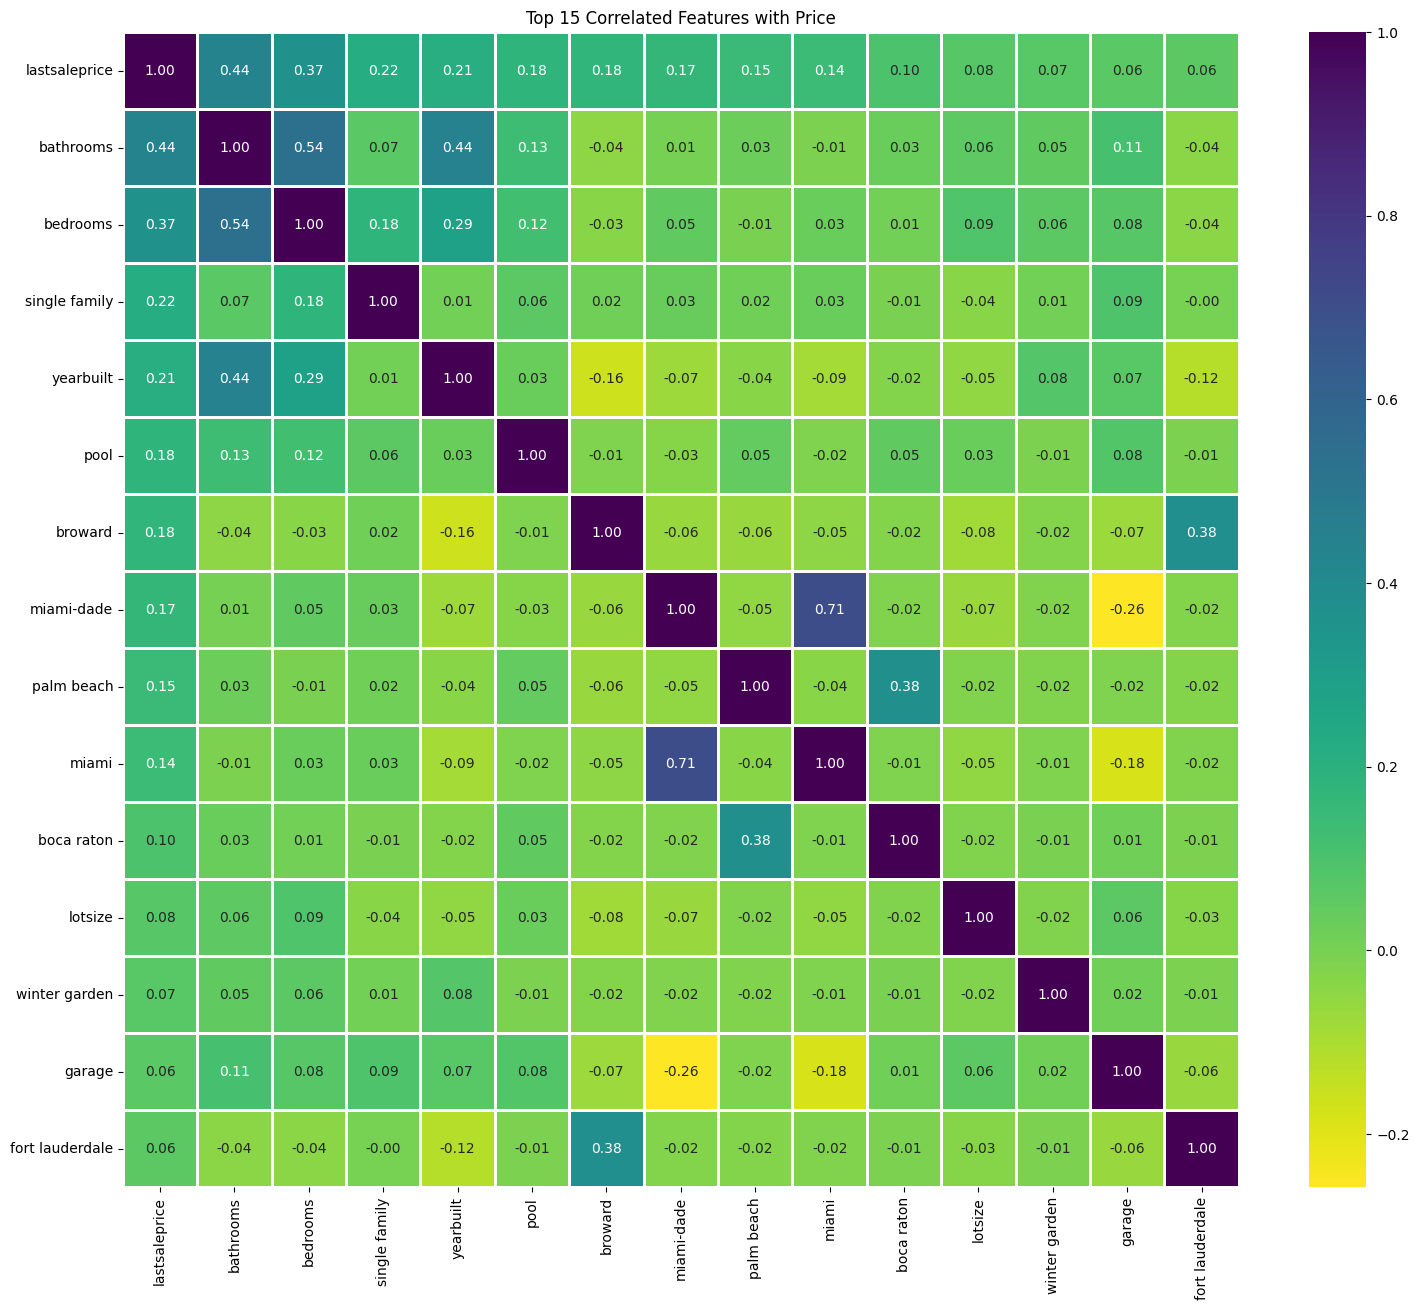

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = data.corr()

# Select the 10 features most correlated with price
k = 15
top_features = corr["lastsaleprice"].nlargest(k).index

# Compute correlation matrix for selected features
correlation_matrix = np.corrcoef(data[top_features].values.T)

# Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis_r", 
            xticklabels=top_features, yticklabels=top_features, linewidths=0.8)
plt.title("Top 15 Correlated Features with Price")
plt.show()

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I tried DecisionTreeRegression 

In [141]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor(max_depth=5, random_state = 42)
#model.fit(X_train_scaled, y_train)

In [142]:
#y_pred = model.predict(X_test_scaled)
#y_pred

In [143]:
#mse = mean_squared_error(y_test, y_pred)
#mse

In [144]:
#r2 = r2_score(y_test, y_pred)
#r2

In [145]:
#mae = mean_absolute_error(y_test, y_pred)
#mae

In [146]:
#mse = mean_squared_error(y_test, y_pred)
#mse

In [147]:
#mae = mean_absolute_error(y_test, y_pred)
#mae

In [148]:
#r2= r2_score(y_test, y_pred)
#r2

In [149]:
#dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

I am now going to Random Forest Regression

In [150]:
#model = RandomForestRegressor(n_estimators = 500, random_state=42,  n_jobs=-1)
#model.fit(X_train_scaled, y_train)

In [151]:
#y_pred = model.predict(X_test_scaled)
#y_pred

In [152]:
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#mse

In [153]:
#r2

In [154]:
#from sklearn.model_selection import RandomizedSearchCV
#
#param_dist = {
#    'n_estimators': [50, 100],  
#    'max_depth': [10, 20, None],  
#    'min_samples_split': [5, 10],  
#    'min_samples_leaf': [2, 4]
#}
#
#random_search_forest = RandomizedSearchCV(
#    model, param_distributions=param_dist, 
#    scoring="r2", cv=4, 
#    n_iter=15,  
#    n_jobs=4,
#    verbose=1,
#    random_state=42
#)
#
#random_search_forest.fit(X_train_scaled, y_train)
#random_search_forest.best_params_

In [155]:
#param_grid = {
#    'n_estimators': [50, 100],  
#    'max_depth': [10, 20, None],  
#    'min_samples_split': [5, 10],  
#    'min_samples_leaf': [2, 4] 
#}
#
#grid_search_forest = GridSearchCV(model, param_grid, scoring="r2", cv=3, n_jobs=-1, verbose=1)
#grid_search_forest.fit(X_train_scaled, y_train)
#
## Get the best hyperparameters
#best_params = grid_search_forest.best_params_
#print(best_params)

In [156]:
#from sklearn.metrics import r2_score
#
## Get the best model
#best_model = random_search_forest.best_estimator_
#
## Make predictions
#y_pred = best_model.predict(X_test_scaled)
#
## Compute R2 score
#r2 = r2_score(y_test, y_pred)
#r2

In [157]:
#best_score = grid_search_forest.best_score_
#print(best_score)

In [158]:
#best_model = grid_search_forest.best_estimator_
#
#y_pred_best = best_model.predict(X_test_scaled)
#
#mse_best = mean_squared_error(y_test, y_pred_best)
#r2_best = r2_score(y_test, y_pred_best)
#
#print(r2_best)

In [159]:
#mse_best

In [160]:
#dump(model, open("random_forest_regressor_default_42.sav", "wb"))

Boosting Algorithm

In [161]:

#from xgboost import XGBRegressor
#
#model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state = 42, n_jobs=-1)
#model.fit(X_train_scaled, y_train)
#
#y_pred = model.predict(X_test_scaled)
#y_pred

In [162]:
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#r2

In [163]:
#import numpy as np
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#
#print("Mean Squared Error:", mse)
#print("Root Mean Squared Error:", rmse)

In [164]:
#from sklearn.model_selection import GridSearchCV
#from xgboost import XGBRegressor
#
#param_grid = {
#    "n_estimators": [100, 300, 500],
#    "max_depth": [3, 6, 9],
#    "learning_rate": [0.01, 0.1, 0.2],
#    "subsample": [0.6, 0.8, 1.0],
#    "colsample_bytree": [0.6, 0.8, 1.0]
#}
#
#xgb = XGBRegressor(objective="reg:squarederror")
#grid_search = GridSearchCV( xgb, param_grid, cv=3, scoring="r2", n_jobs=-1)
#grid_search.fit(X_train_scaled, y_train)
#
#print("Best Parameters:", grid_search.best_params_)

In [165]:
#best_xgb_model = grid_search.best_estimator_
#
#
#y_pred_best = best_xgb_model.predict(X_test_scaled)
#r2_best = r2_score(y_test, y_pred_best)
#
## Print R² score
#r2_best

In [166]:

#dump(model, open("xgb_regressor_default_42.sav", "wb"))

LightGBM 

In [167]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=100, random_state=42, n_jobs=-1)
lgb_model.fit(X_train_scaled, y_train)

y_pred = lgb_model.predict(X_test_scaled)
y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 53799, number of used features: 24
[LightGBM] [Info] Start training from score 402771.955445


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([426624.56605658, 389112.53208969, 550770.48260095, ...,
       289106.21346825, 283358.32012126, 234415.10028546], shape=(13450,))

In [168]:
r2 = r2_score(y_test, y_pred)
r2

0.6139197899163069

In [169]:

mse = mean_squared_error(y_test, y_pred)
mse

13688980379.43121

In [170]:
print("First 5 Predictions:", y_pred[:5])


First 5 Predictions: [426624.56605658 389112.53208969 550770.48260095 696518.52123221
 148227.802737  ]


In [171]:
print("Actual Prices:", y_test[:5].values) 


Actual Prices: [409500. 244000. 540000. 790000. 115000.]


In [172]:
import numpy as np
print("Min Prediction:", np.min(y_pred))
print("Max Prediction:", np.max(y_pred))
print("Mean Prediction:", np.mean(y_pred))

Min Prediction: 26546.332943547135
Max Prediction: 1011342.9332665054
Mean Prediction: 403177.572477449


In [173]:
dump(lgb_model, open("ligthGBM_algorithm_regressor_default_42.sav", "wb"))

Lasso Regression (L1 Regularization)

In [174]:
#from sklearn.linear_model import Lasso
#
#lasso_model = Lasso(alpha=0.1)
#lasso_model.fit(X_train_scaled, y_train)
#
#y_pred = lasso_model.predict(X_test_scaled)
#y_pred

In [175]:
#r2 = r2_score(y_test, y_pred)
#r2

In [176]:
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse


In [177]:
#dump(lasso_model, open("lasso_algorithm_regressor_default_42.sav", "wb"))

KNN Regression Model

In [178]:
#from sklearn.neighbors import KNeighborsRegressor
#knn_model = KNeighborsRegressor(n_neighbors=5, weights="uniform") 
#knn_model.fit(X_train_scaled, y_train)

In [179]:
#y_pred = knn_model.predict(X_test_scaled)
#y_pred

In [180]:
#r2 = r2_score(y_test, y_pred)
#r2

In [181]:
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse


In [182]:
#dump(knn_model, open("knn_algorithm_regressor_default_42.sav", "wb"))

Neural Regression

In [183]:
#from sklearn.neural_network import MLPRegressor
#from sklearn.metrics import mean_squared_error, r2_score
#
## Define the neural network regressor
#mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 25), warm_start=True, activation='relu', n_iter_no_change=10, solver='adam', alpha=0.001, learning_rate='adaptive', max_iter=500, random_state=42)
#
#
#mlp_regressor.fit(X_train_scaled, y_train)
#
#
#y_pred_mlp = mlp_regressor.predict(X_test_scaled)
#
#
#mse_mlp = mean_squared_error(y_test, y_pred_mlp)
#r2_mlp = r2_score(y_test, y_pred_mlp)
#
#
#print("Neural Network R² Score:", r2_mlp)

In [184]:
#import pickle
#with open("mlp_regressor_model.pkl", "wb") as f:
#    pickle.dump(mlp_regressor, f)